<a href="https://colab.research.google.com/github/Arjun-57561/STAIML-WORKS/blob/main/Staiml_ASSIGNMENT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

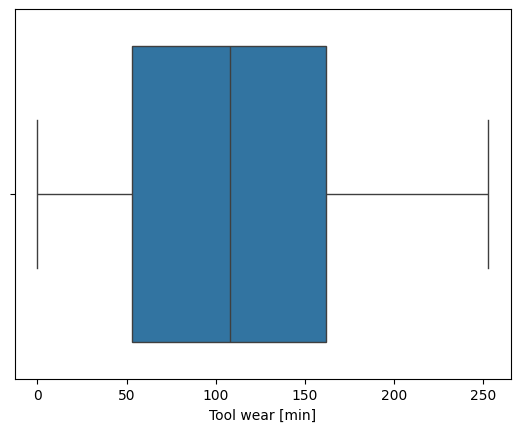

Outliers:
Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF, z_scores]
Index: []


In [3]:
#QUESTION 1
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/ai4i2020.csv")

# Visualize the distribution of the tool wear column using a boxplot
sns.boxplot(x=data['Tool wear [min]'])
plt.show()

# Calculate z-scores to identify outliers
data['z_scores'] = (data['Tool wear [min]'] - data['Tool wear [min]'].mean()) / data['Tool wear [min]'].std()

# Identify outliers using a threshold (e.g., z-score > 3)
outliers = data[data['z_scores'].abs() > 3]

# Print the outliers
print("Outliers:")
print(outliers)

# Depending on your analysis, we can choose to remove or adjust outliers
# For example, to remove outliers:
clean_data = data[data['z_scores'].abs() <= 3]


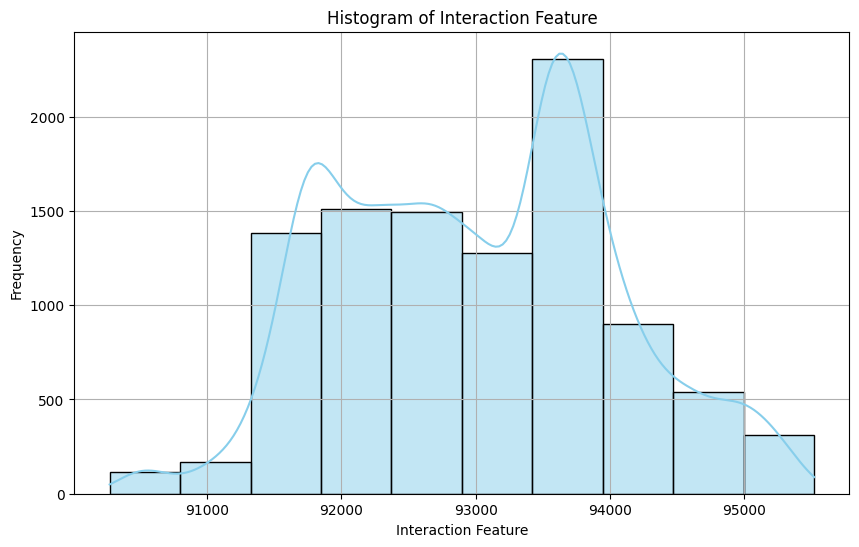

In [4]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'air_temperature' and 'process_temperature'
# Example DataFrame creation (assuming 'data' already exists)

# Create a new column 'interaction_feature' by multiplying air temperature and process temperature
data['interaction_feature'] = data['Air temperature [K]'] * data['Process temperature [K]']

# Display the DataFrame with the new feature
data.head()

# Plotting histogram for the interaction feature

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['interaction_feature'], bins=10, kde=True, color='skyblue')
plt.xlabel('Interaction Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Interaction Feature')
plt.grid(True)
plt.show()


Original Data:
        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  

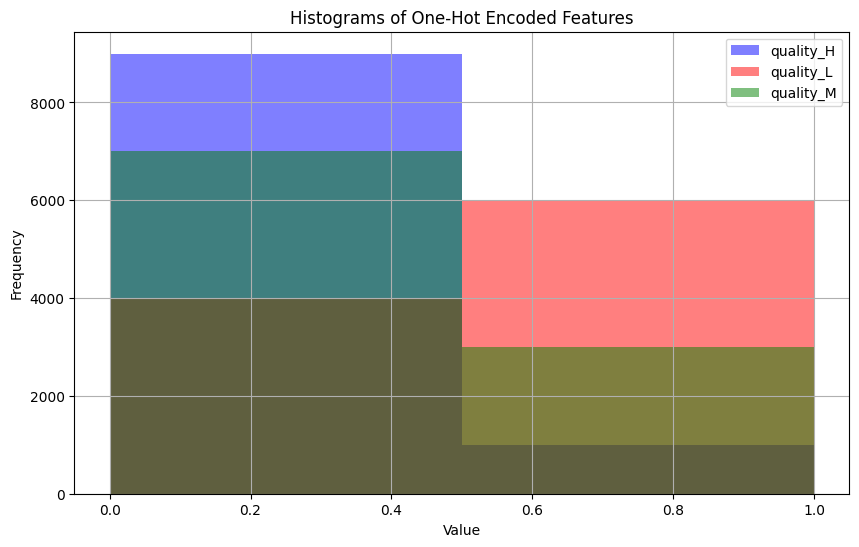

In [6]:
#QUESTION 3

# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with product quality variant
data = pd.read_csv("/content/ai4i2020.csv")

# Display the DataFrame
print("Original Data:")
print(data)

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(data['Type'], prefix='quality')
data_encoded_one_hot = pd.concat([data, one_hot_encoded], axis=1)
print("\nOne-Hot Encoded Data:")
print(data_encoded_one_hot)

# Ordinal Encoding
ordinal_mapping = {'L': 0, 'M': 1, 'H': 2}
data['quality_variant_encoded'] = data['Type'].map(ordinal_mapping)
print("\nOrdinal Encoded Data:")
print(data)

# Plot histograms for one-hot encoded features
# Assuming one-hot encoded features are 'quality_H', 'quality_L', and 'quality_M'
plt.figure(figsize=(10, 6))
plt.hist(data_encoded_one_hot['quality_H'], bins=2, color='blue', alpha=0.5, label='quality_H')
plt.hist(data_encoded_one_hot['quality_L'], bins=2, color='red', alpha=0.5, label='quality_L')
plt.hist(data_encoded_one_hot['quality_M'], bins=2, color='green', alpha=0.5, label='quality_M')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of One-Hot Encoded Features')
plt.legend()
plt.grid(True)
plt.show()


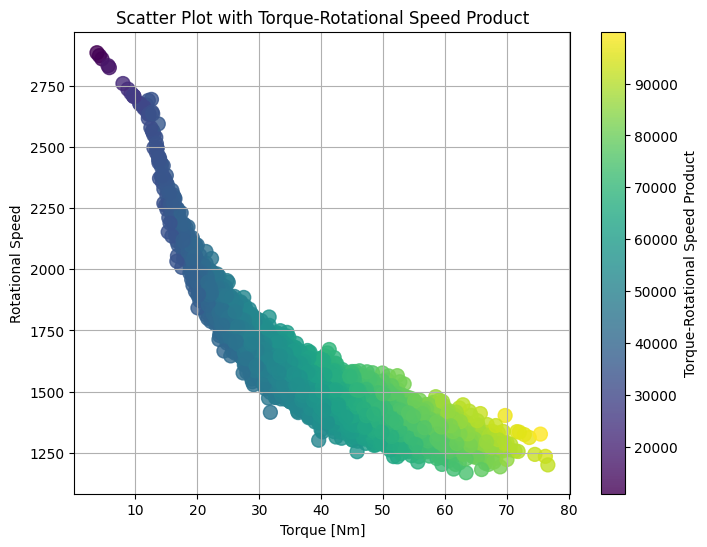

In [7]:
#QUESTION 4
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/ai4i2020.csv")

# Create a new column 'torque_rotational_speed_product' by multiplying torque and rotational speed
data['torque_rotational_speed_product'] = data['Torque [Nm]'] * data['Rotational speed [rpm]']

# Display the DataFrame with the new feature
data.head()

# Scatter plot of torque vs. rotational_speed with color mapped to torque_rotational_speed_product
plt.figure(figsize=(8, 6))
plt.scatter(data['Torque [Nm]'], data['Rotational speed [rpm]'], c=data['torque_rotational_speed_product'], cmap='viridis', s=100, alpha=0.8)
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational Speed')
plt.title('Scatter Plot with Torque-Rotational Speed Product')
plt.colorbar(label='Torque-Rotational Speed Product')
plt.grid(True)
plt.show()


Duplicated Rows:
Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

DataFrame after removing duplicates:
        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0   

<ipython-input-10-1f657013183a>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


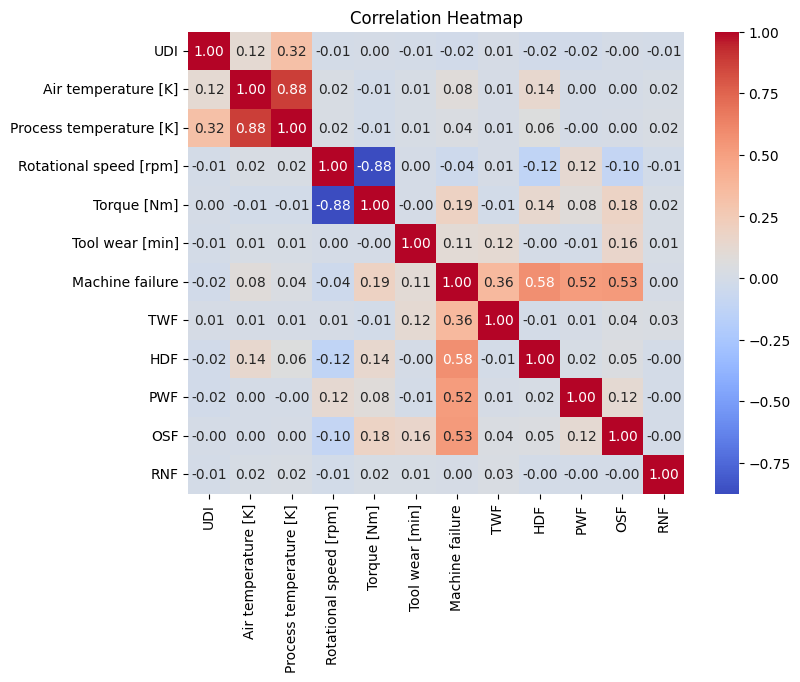

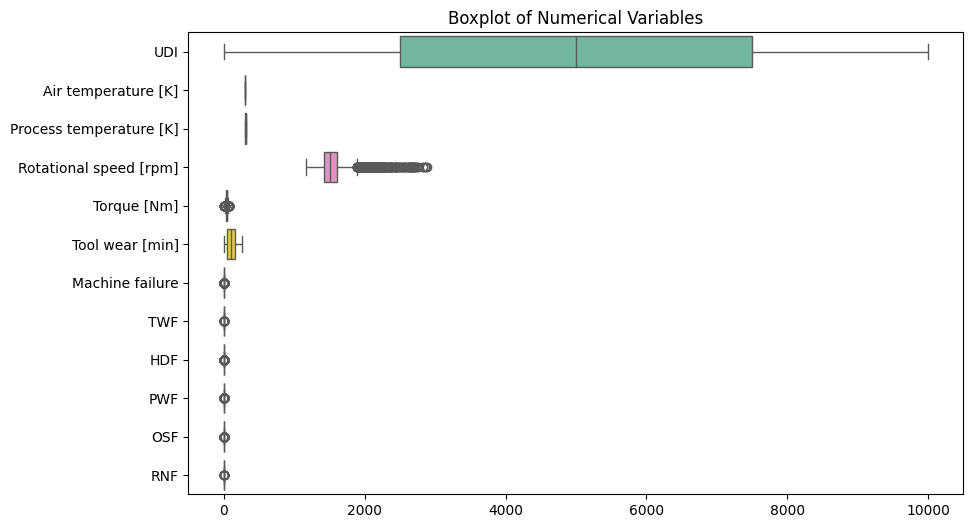

In [10]:
#QUESTION 5
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/ai4i2020.csv"
data = pd.read_csv(file_path)

# Check for duplicated rows
duplicates = data[data.duplicated()]

# Display duplicated rows
print("Duplicated Rows:")
print(duplicates)

# Remove duplicates if any
clean_data = data.drop_duplicates()

# Display cleaned DataFrame
print("\nDataFrame after removing duplicates:")
print(clean_data)

# Correlation heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Box plot to visualize the distribution of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title('Boxplot of Numerical Variables')
plt.show()


Normalized Numerical Features:
      UDI  Air temperature [K]  Process temperature [K]  \
0  0.0000             0.304348                 0.358025   
1  0.0001             0.315217                 0.370370   
2  0.0002             0.304348                 0.345679   
3  0.0003             0.315217                 0.358025   
4  0.0004             0.315217                 0.370370   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                0.222934     0.535714         0.000000              0.0  0.0   
1                0.139697     0.583791         0.011858              0.0  0.0   
2                0.192084     0.626374         0.019763              0.0  0.0   
3                0.154249     0.490385         0.027668              0.0  0.0   
4                0.139697     0.497253         0.035573              0.0  0.0   

   HDF  PWF  OSF  RNF  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0 

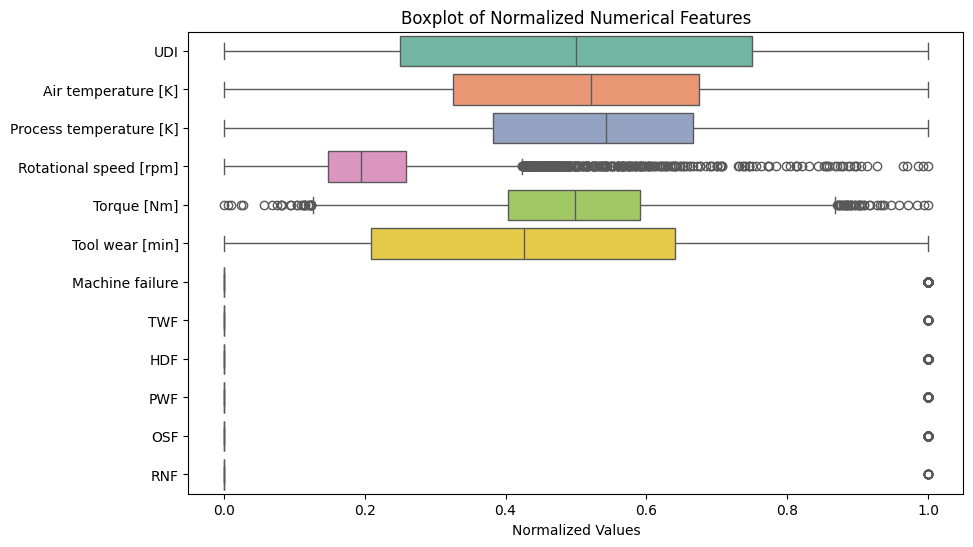

In [11]:
#QUESTION 6
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/ai4i2020.csv"
data = pd.read_csv(file_path)

# Separate numerical and categorical features (assuming all non-object columns are numerical)
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Normalize numerical features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(numerical_features)

# Convert normalized_features back to DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)

# Display the first few rows of the normalized DataFrame
print("Normalized Numerical Features:")
print(normalized_df.head())

# Plot boxplot of normalized numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_df, orient='h', palette='Set2')
plt.title('Boxplot of Normalized Numerical Features')
plt.xlabel('Normalized Values')
plt.show()


<ipython-input-13-7de7a44f225a>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numeric.corr()


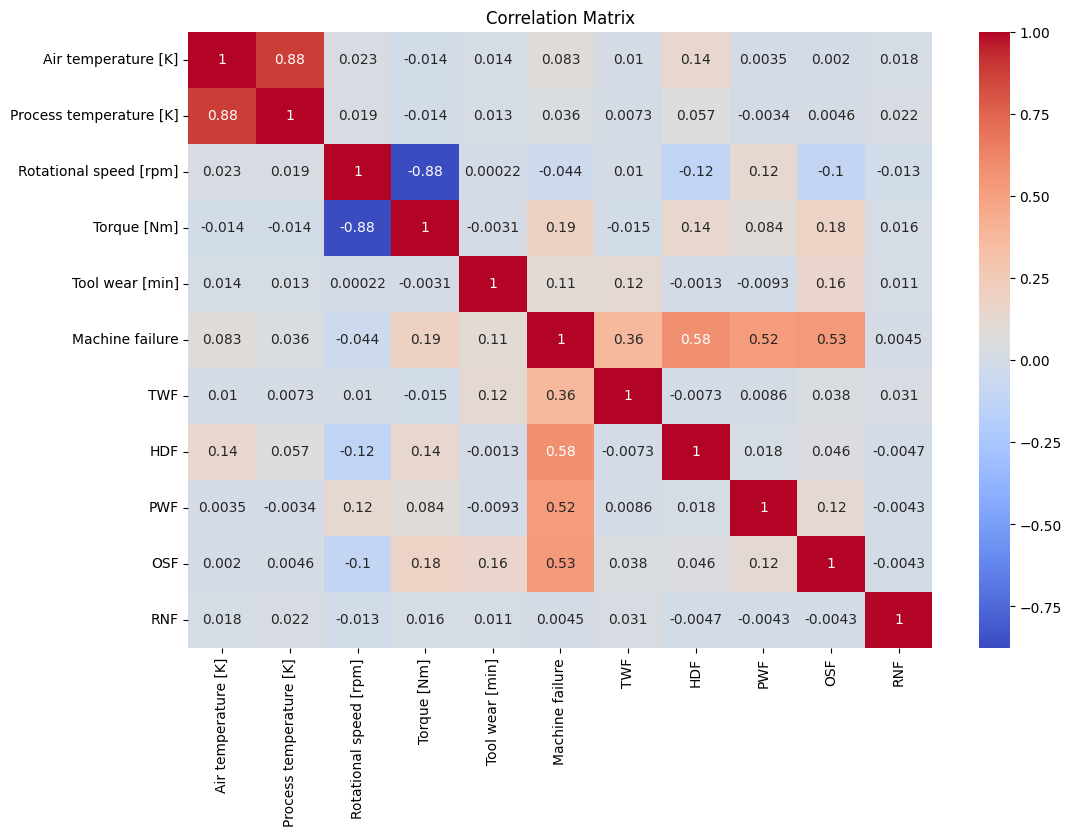

In [13]:
#QUESTION 7
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
url = "/content/ai4i2020.csv"
df = pd.read_csv(url)

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(columns=['UDI', 'Product ID'])

# Perform one-hot encoding for categorical variables if needed

# Split the dataset into features (X) and target variable (y)
X = df_numeric.drop(columns=['Tool wear [min]'])  # Features
y = df_numeric['Tool wear [min]']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Column Names: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
Data Types:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
Train RMSE: 61.93814536533958
Test RMSE: 64.36821117167028
Train R^2 Score: 0.04017447769255955
Test R^2 Score: 0.029525084063593


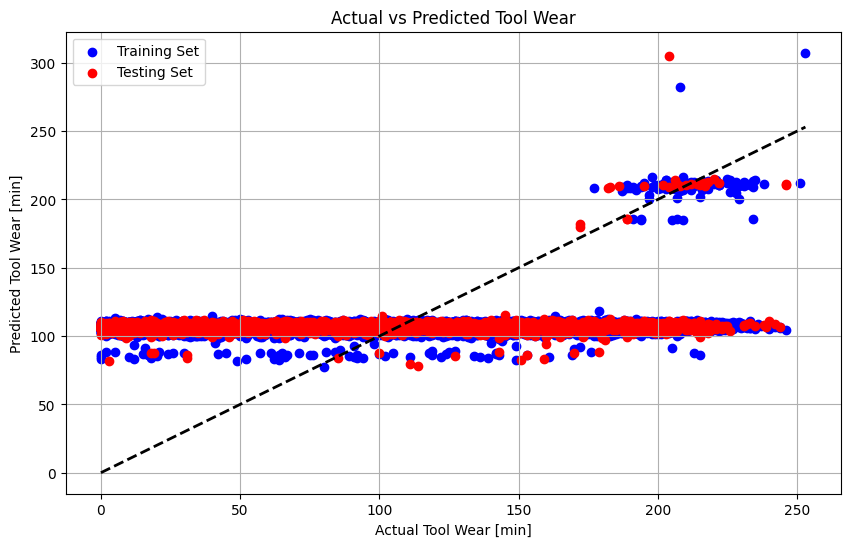

In [16]:
#QUESTION 8
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path= "/content/ai4i2020.csv"
df = pd.read_csv(file_path)

# Check the column names to identify the correct column name for product quality variant
print("Column Names:", df.columns)

# Check the data types of each column
print("Data Types:\n", df.dtypes)

# Drop non-numeric columns (assuming 'Product ID' is non-numeric)
df_numeric = df.drop(columns=['Product ID'])

# Perform one-hot encoding for 'Type' (product quality)
df_encoded = pd.get_dummies(df_numeric, columns=['Type'])

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['Tool wear [min]'])  # Features
y = df_encoded['Tool wear [min]']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting actual vs predicted values for training set and testing set together
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for training set
plt.scatter(y_train, y_pred_train, color='blue', label='Training Set')

# Plot actual vs predicted values for testing set
plt.scatter(y_test, y_pred_test, color='red', label='Testing Set')

# Plot the diagonal line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Tool Wear [min]')
plt.ylabel('Predicted Tool Wear [min]')
plt.title('Actual vs Predicted Tool Wear')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()
